# Data pre-processing of the Adultdataset

## Loading Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [48]:
df = pd.read_csv("adult.csv")

In [49]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1. Exploring dataset

### - Give summary statistics of Adult Dataset

In [50]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Explore the values and/or outliers.

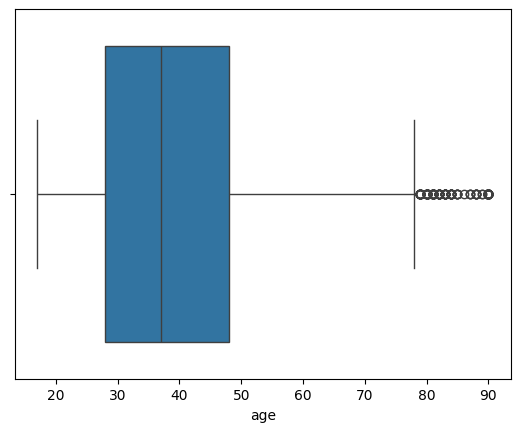

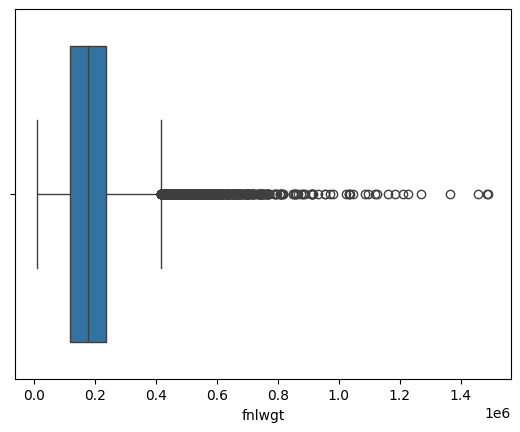

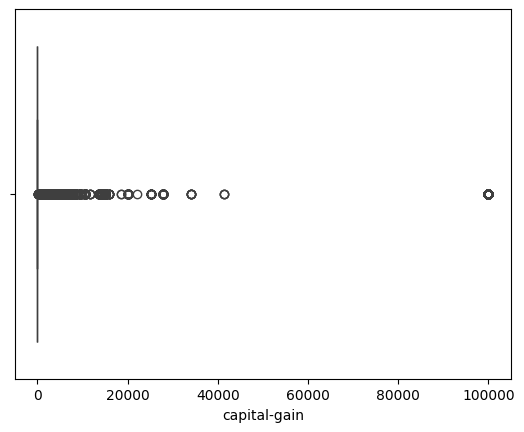

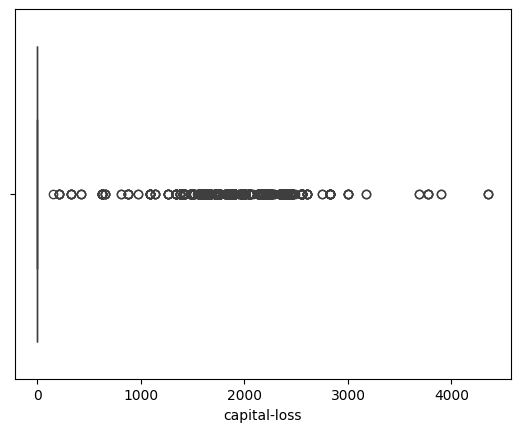

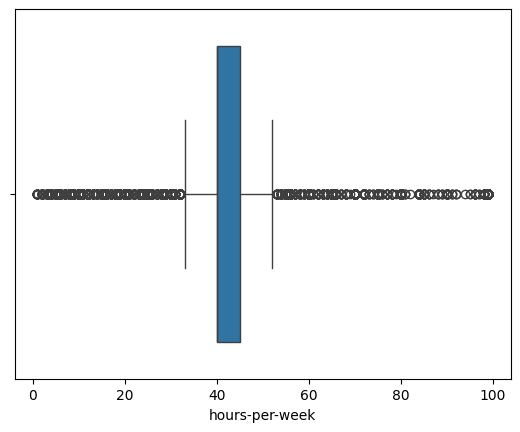

In [51]:
sns.boxplot(x=df['age'])
plt.show()
sns.boxplot(x=df['fnlwgt'])
plt.show()
sns.boxplot(x=df['capital-gain'])
plt.show()
sns.boxplot(x=df['capital-loss'])
plt.show()
sns.boxplot(x=df['hours-per-week'])
plt.show()


### Which variables are categorical, and which are numerical?

In [52]:
# Categorical variables:
categorical_cols = ['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# Numerical variables:
numerical_cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

print("Categorical variables:")
for i in categorical_cols:
    print("\t",i)
print("Numerical variables:")
for i in numerical_cols:
    print("\t",i)


Categorical variables:
	 workclass
	 education
	 educational-num
	 marital-status
	 occupation
	 relationship
	 race
	 gender
	 native-country
	 income
Numerical variables:
	 age
	 fnlwgt
	 capital-gain
	 capital-loss
	 hours-per-week


### Explore the categorical variables.

In [53]:
for i in categorical_cols:
    print(f"{i} Mode","=",df[i].mode().values[0])

workclass Mode = Private
education Mode = HS-grad
educational-num Mode = 9
marital-status Mode = Married-civ-spouse
occupation Mode = Prof-specialty
relationship Mode = Husband
race Mode = White
gender Mode = Male
native-country Mode = United-States
income Mode = <=50K


### Explore the numerical variables.

In [54]:
for i in numerical_cols:
    print(df[i].describe(),end="\n\n")

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         9

## 2. Processing missing values and/or outliers

### Explain how you handle the missing of categorical or/and numerical variables?

Answer : in Numerical variable using median and categorical variable using mode

In [55]:
for col in df.columns:
  count = df[col][df[col] == '?'].count()
  print(f"Column {col}: {count} '?' values")

Column age: 0 '?' values
Column workclass: 2799 '?' values
Column fnlwgt: 0 '?' values
Column education: 0 '?' values
Column educational-num: 0 '?' values
Column marital-status: 0 '?' values
Column occupation: 2809 '?' values
Column relationship: 0 '?' values
Column race: 0 '?' values
Column gender: 0 '?' values
Column capital-gain: 0 '?' values
Column capital-loss: 0 '?' values
Column hours-per-week: 0 '?' values
Column native-country: 857 '?' values
Column income: 0 '?' values


In [56]:
for col in categorical_cols:
    df[col] = df[col].replace('?', df[col].mode().values[0])
for i in numerical_cols:
    df[i] = df[i].fillna(df[i].median())
for col in df.columns:
  count = df[col][df[col] == '?'].count()
  print(f"Column {col}: {count} '?' values")

Column age: 0 '?' values
Column workclass: 0 '?' values
Column fnlwgt: 0 '?' values
Column education: 0 '?' values
Column educational-num: 0 '?' values
Column marital-status: 0 '?' values
Column occupation: 0 '?' values
Column relationship: 0 '?' values
Column race: 0 '?' values
Column gender: 0 '?' values
Column capital-gain: 0 '?' values
Column capital-loss: 0 '?' values
Column hours-per-week: 0 '?' values
Column native-country: 0 '?' values
Column income: 0 '?' values


### What are your strategies of handling missing values or/and outliers?

- in missing value using Numerical Variable using median and Categorical variable using mode
- outlier using Quatile and IQR

In [66]:
for i in numerical_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"Outliers in {i}:")
    print(f"Lower Bound : {lower_bound} Upper Bound : {upper_bound} Count :",outliers[i].count(),"\n")

Outliers in age:
Lower Bound : -2.0 Upper Bound : 78.0 Count : 216 

Outliers in fnlwgt:
Lower Bound : -62586.75 Upper Bound : 417779.25 Count : 1453 

Outliers in capital-gain:
Lower Bound : 0.0 Upper Bound : 0.0 Count : 4035 

Outliers in capital-loss:
Lower Bound : 0.0 Upper Bound : 0.0 Count : 2282 

Outliers in hours-per-week:
Lower Bound : 32.5 Upper Bound : 52.5 Count : 13496 



## 3. Processing categorical and/or numerical data

### Explain how you do transformation ( categorical => numerical, or numerical => categorical )

1. Counting unique value if it more than 2 it's not good for dummy encoding because it will produce sparse table (too much zero)

In [67]:
print("Numerical Cols")
for col in numerical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

print()

print("Categorical Cols")
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].nunique()}")


Numerical Cols
Unique values in age: 74
Unique values in fnlwgt: 28523
Unique values in capital-gain: 123
Unique values in capital-loss: 99
Unique values in hours-per-week: 96

Categorical Cols
Unique values in workclass: 8
Unique values in education: 16
Unique values in educational-num: 16
Unique values in marital-status: 7
Unique values in occupation: 14
Unique values in relationship: 6
Unique values in race: 5
Unique values in gender: 2
Unique values in native-country: 41
Unique values in income: 2


In [59]:
income_encoded = pd.get_dummies(df['income'], prefix='income')
income_encoded.head()

,income_<=50K,income_>50K
0,True,False
1,True,False
2,False,True
3,False,True
4,True,False


In [60]:
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')
gender_encoded.head()

,gender_Female,gender_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


## 4. Feature scaling & Split Train/Test data

### Explain how you scale the numerical features?

1. remove outliers with iqr
2. plot data without outlier histogram to check is it normal distribution and comparison data with outlier
3. using z-score and min-max scaler

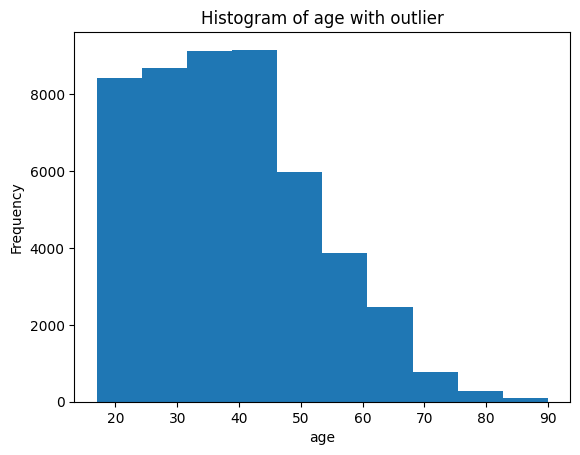

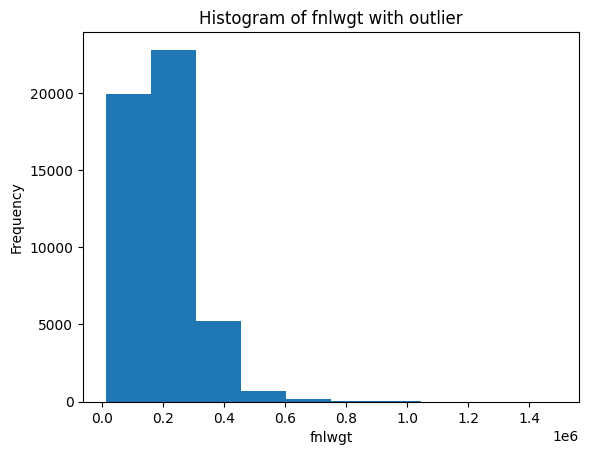

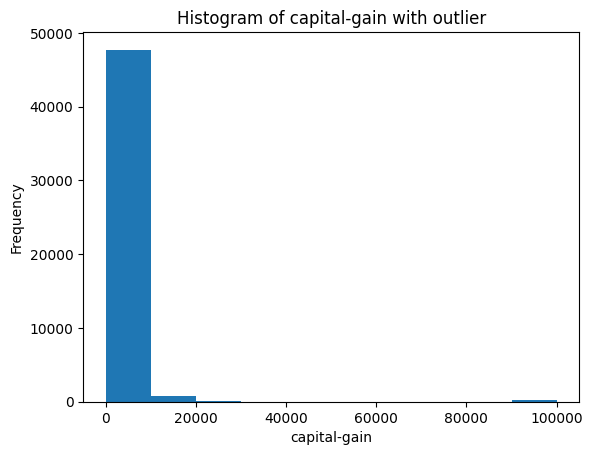

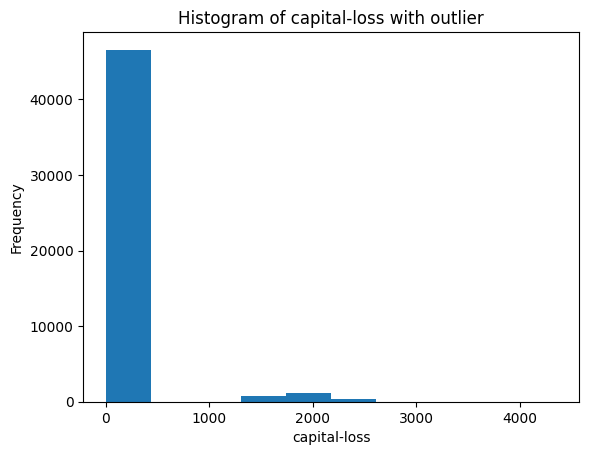

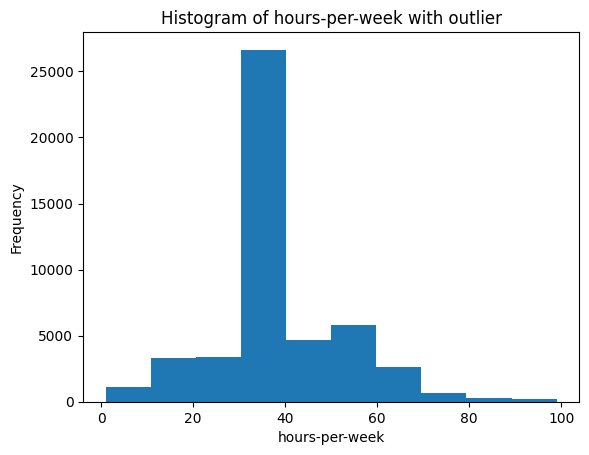

In [68]:
for col in numerical_cols:
    plt.hist(df[col])
    plt.title(f'Histogram of {col} with outlier')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [69]:
df_no_outliers = df.copy()
for i in numerical_cols:
    q1 = df_no_outliers[i].quantile(0.25)
    q3 = df_no_outliers[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_no_outliers = df_no_outliers[(df_no_outliers[i] >= lower_bound) & (df_no_outliers[i] <= upper_bound)]

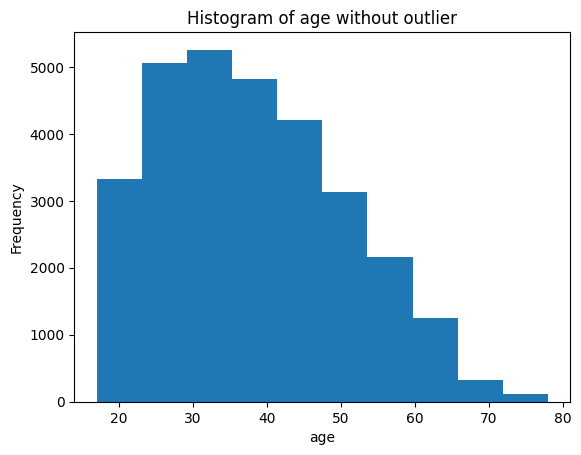

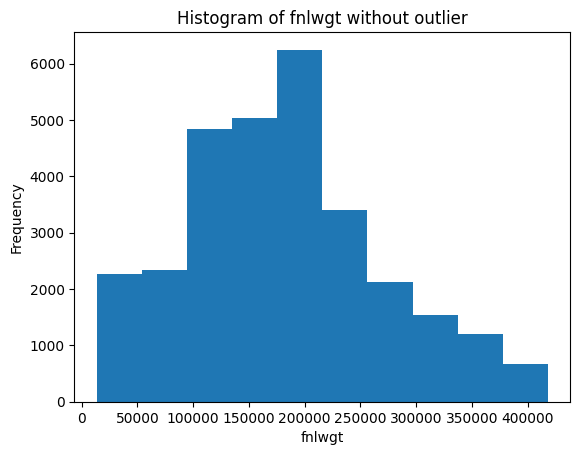

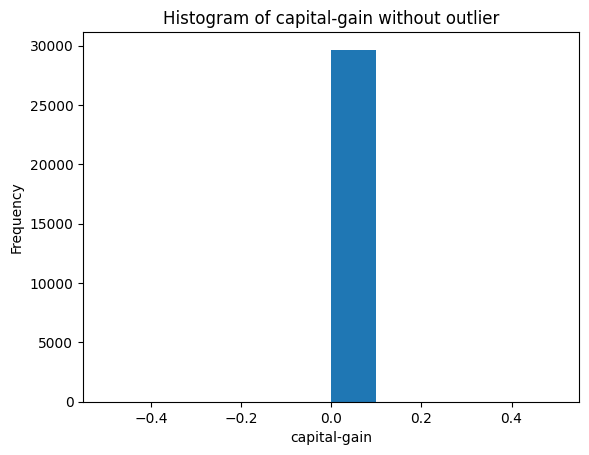

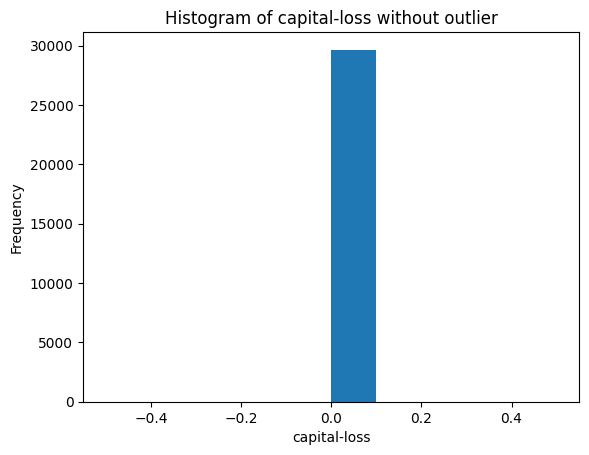

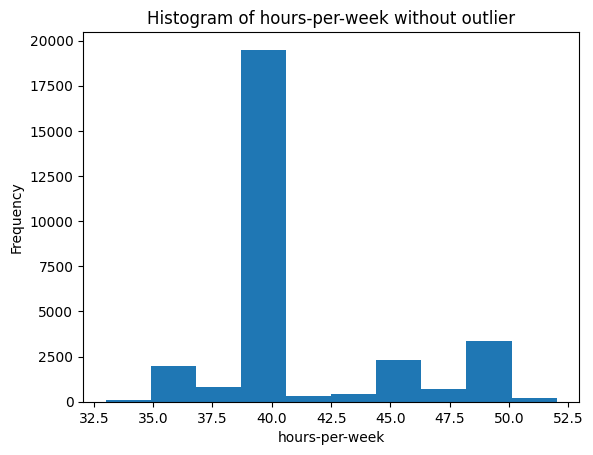

In [70]:
for col in numerical_cols:
    plt.hist(df_no_outliers[col])
    plt.title(f'Histogram of {col} without outlier')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

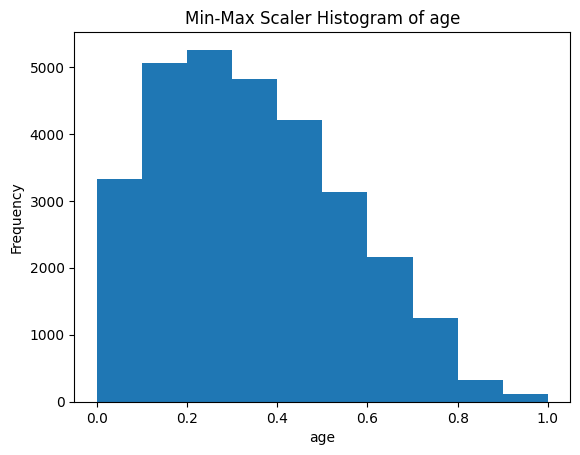

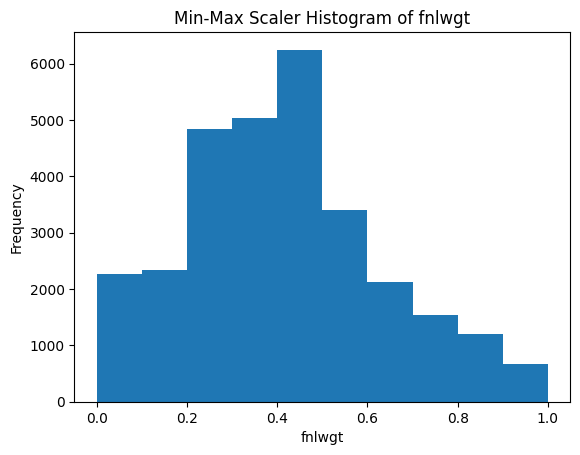

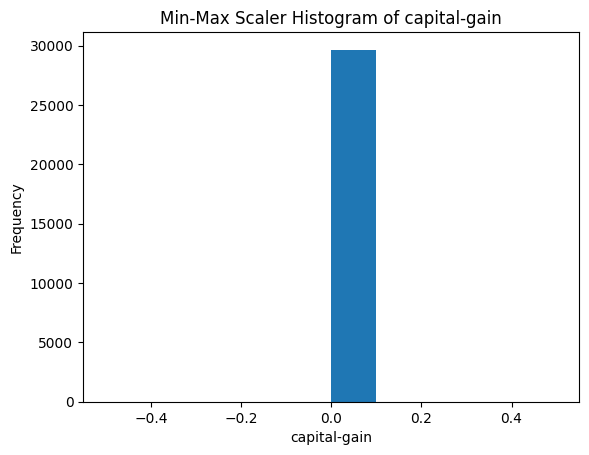

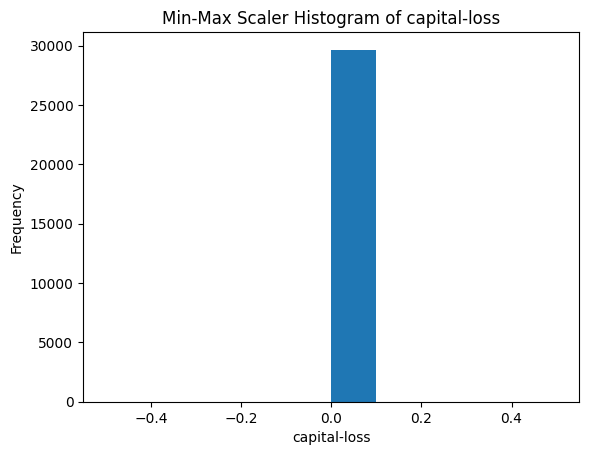

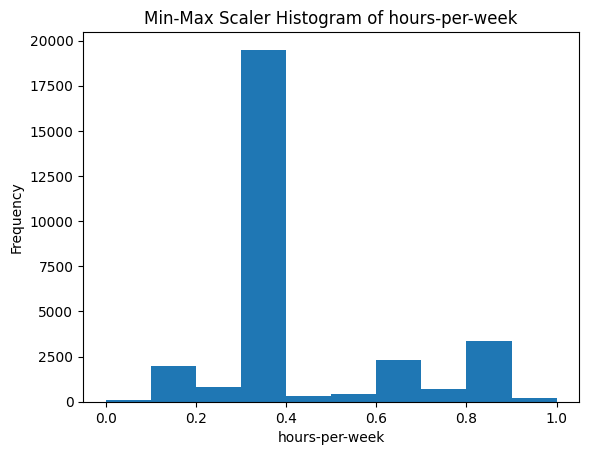

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0.131148,0.526982,0.0,0.0,0.368421
1,0.344262,0.188113,0.0,0.0,0.894737
2,0.180328,0.799459,0.0,0.0,0.368421
6,0.196721,0.527536,0.0,0.0,0.368421
8,0.114754,0.880389,0.0,0.0,0.368421


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_copy = df_no_outliers.copy()
df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])
for col in numerical_cols:
    plt.hist(df_copy[col])
    plt.title(f'Min-Max Scaler Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
df_copy[numerical_cols].head()

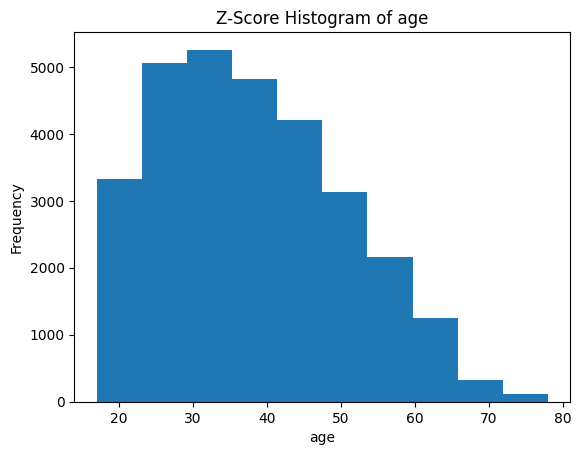

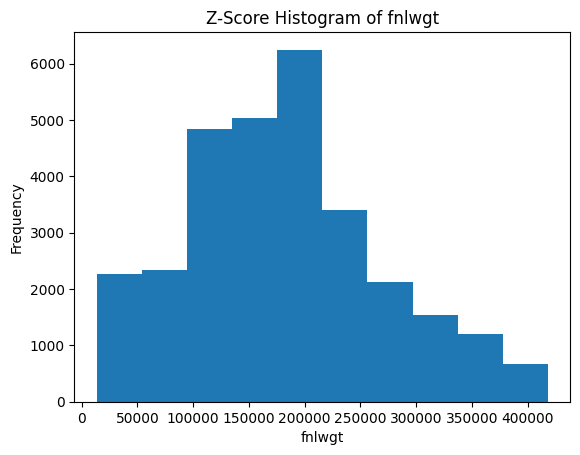

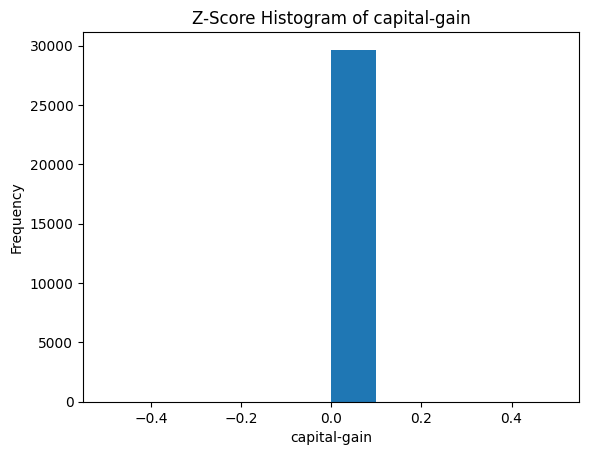

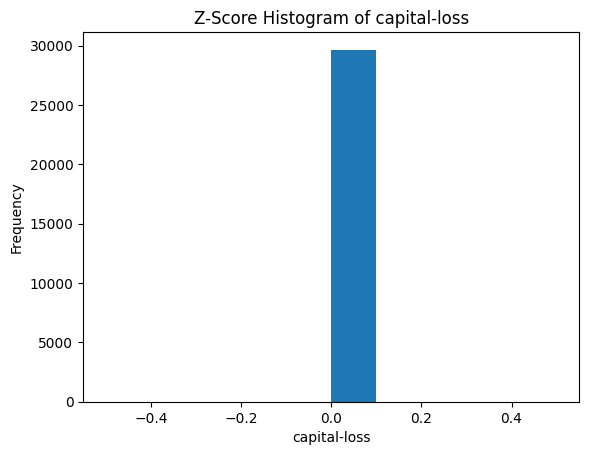

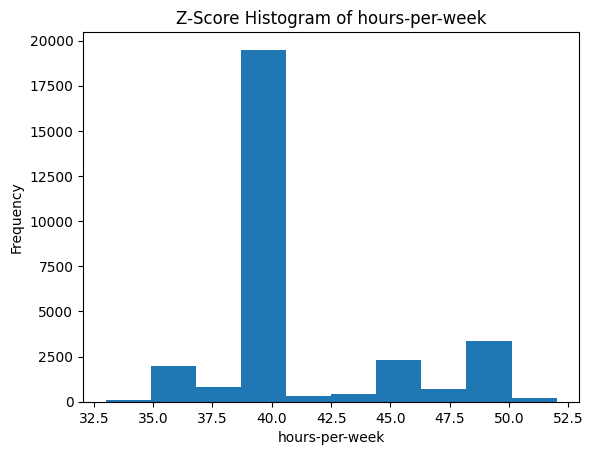

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,-1.087903,0.521294,0.0,0.0,-0.365748
1,-0.024162,-1.046879,0.0,0.0,2.168156
2,-0.842424,1.782228,0.0,0.0,-0.365748
6,-0.760598,0.523859,0.0,0.0,-0.365748
8,-1.169729,2.156745,0.0,0.0,-0.365748


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_copy = df_no_outliers.copy()
df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])
df_copy[numerical_cols]
for col in numerical_cols:
    plt.hist(df_no_outliers[col])
    plt.title(f'Z-Score Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
df_copy[numerical_cols].head()